# Simple Qubit Spectroscopy Demo

This notebook demonstrates four essential spectroscopy experiments:
1. Resonator Spectroscopy
2. Single-tone Frequency Spectroscopy
3. Amplitude-Frequency 2D Spectroscopy
4. Two-tone Spectroscopy

In [1]:
import numpy as np

from leeq.experiments.experiments import ExperimentManager
from leeq.experiments.builtin.basic.calibrations.qubit_spectroscopy import (
    QubitSpectroscopyFrequency,
    QubitSpectroscopyAmplitudeFrequency
)
from leeq.experiments.builtin.basic.calibrations.two_tone_spectroscopy import TwoToneQubitSpectroscopy
from leeq.experiments.builtin.basic.calibrations.resonator_spectroscopy import (
    ResonatorSweepTransmissionWithExtraInitialLPB
)
from leeq.core.elements.built_in.qudit_transmon import TransmonElement
from leeq.setups.built_in.setup_simulation_high_level import HighLevelSimulationSetup
from leeq.theory.simulation.numpy.rotated_frame_simulator import VirtualTransmon
from leeq.chronicle import Chronicle

Chronicle().start_log()

[2025-08-24 16:14:41] [INFO] [leeq.chronicle.chronicle] Log started at log/coxious/2025-08/2025-08-24/16.14.41


In [2]:
# Setup
manager = ExperimentManager()
manager.clear_setups()

virtual_transmon = VirtualTransmon(
    name="VQubit1",
    qubit_frequency=5000.0,
    anharmonicity=-200.0,
    t1=50,
    t2=25,
    readout_frequency=9500.0,
    quiescent_state_distribution=np.array([0.9, 0.08, 0.02, 0.0])
)

setup = HighLevelSimulationSetup(
    name='SimpleSpectroscopyDemo',
    virtual_qubits={1: virtual_transmon}
)

manager.register_setup(setup)

In [3]:
# Qubit configuration
qubit_config = {
    'lpb_collections': {
        'f01': {
            'type': 'SimpleDriveCollection',
            'freq': 5000.0,
            'channel': 1,
            'shape': 'blackman_drag',
            'amp': 0.5,
            'phase': 0.,
            'width': 0.05,
            'alpha': 500,
            'trunc': 1.2
        }
    },
    'measurement_primitives': {
        '0': {
            'type': 'SimpleDispersiveMeasurement',
            'freq': 9500.0,
            'channel': 1,
            'shape': 'square',
            'amp': 0.15,
            'phase': 0.,
            'width': 1,
            'trunc': 1.2,
            'distinguishable_states': [0, 1]
        }
    }
}

qubit = TransmonElement(name='Q1', parameters=qubit_config)

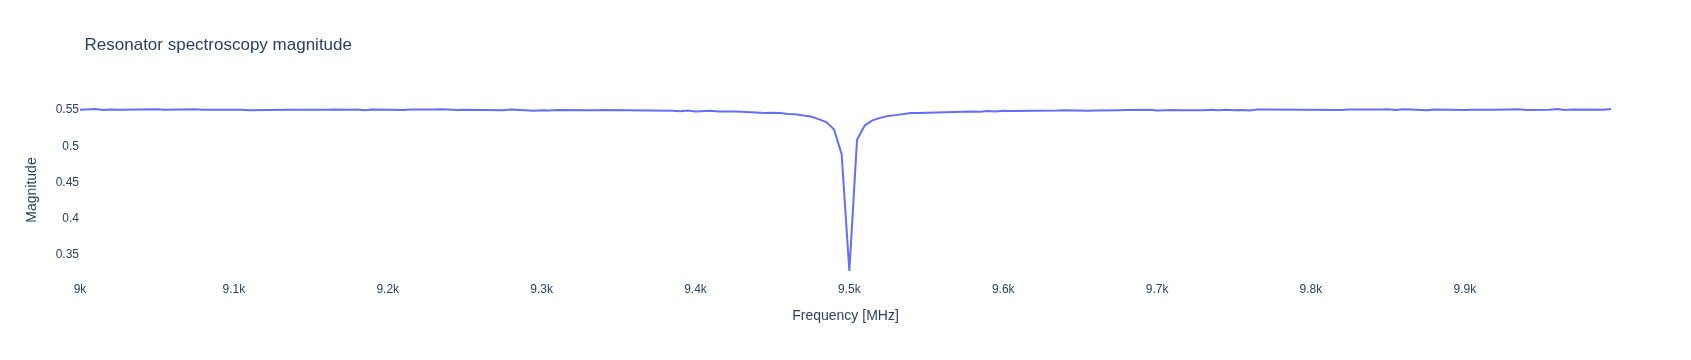

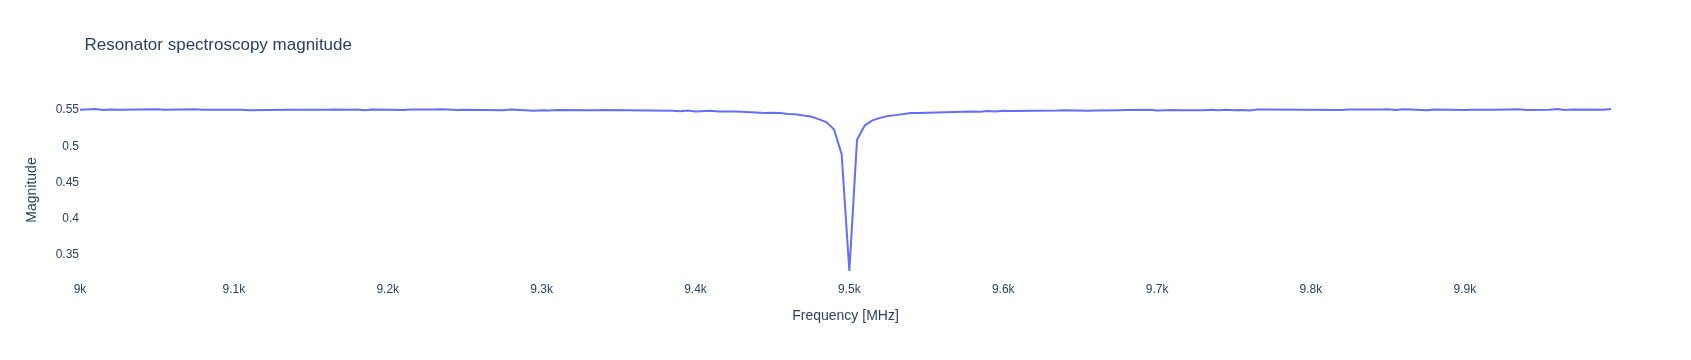

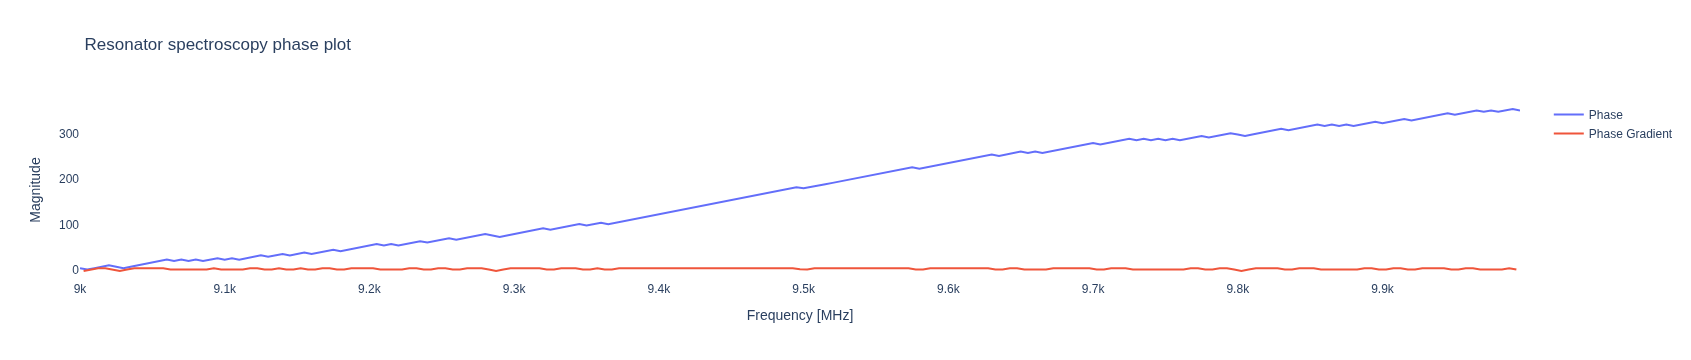

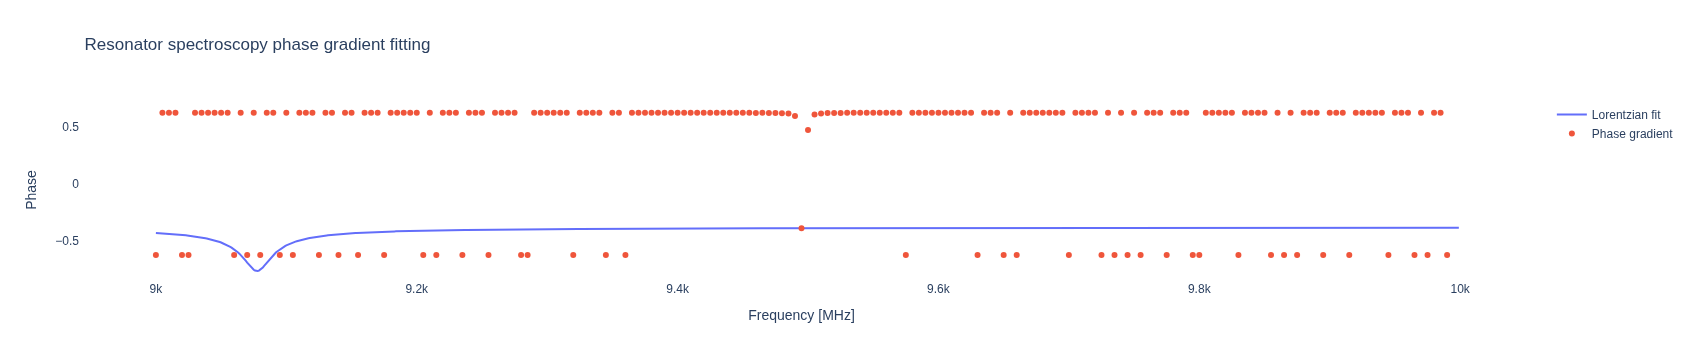

<IPython.core.display.JSON object>

In [4]:
# 1. Resonator spectroscopy
resonator_spec = ResonatorSweepTransmissionWithExtraInitialLPB(
    dut_qubit=qubit,
    start=9000.0,
    stop=10000.0,
    step=5.0,
    num_avs=1000,
    amp=0.02,
    mp_width=8.0
)

In [5]:
# 2. Single-tone frequency spectroscopy
freq_spec = QubitSpectroscopyFrequency(
    dut_qubit=qubit,
    start=4980.0,
    stop=5020.0,
    step=0.5,
    num_avs=1000,
    amp=0.1,
    mp_width=1.0,
    disable_noise=True
)

<IPython.core.display.JSON object>

In [ ]:
# 3. Amplitude-frequency 2D spectroscopy (parallelized by default for 4-8x speedup)
exp_2d = QubitSpectroscopyAmplitudeFrequency(
    dut_qubit=qubit,
    start=4980.0,
    stop=5020.0,
    step=0.2,
    qubit_amp_start=0.001,
    qubit_amp_stop=0.01,
    qubit_amp_step=0.0001,
    num_avs=1000,
    disable_noise=True
    # Note: use_parallel=True by default for automatic CPU parallelization
)

Using parallel processing with 16 workers...


In [7]:
# 4. Two-tone spectroscopy (parallelized by default for 4-8x speedup)
two_tone_spec = TwoToneQubitSpectroscopy(
    dut_qubit=qubit,
    tone1_start=4980.0,
    tone1_stop=5020.0,
    tone1_step=2.0,
    tone1_amp=0.1,
    tone2_start=4980.0,
    tone2_stop=5020.0,
    tone2_step=2.0,
    tone2_amp=0.1,
    same_channel=True,
    num_avs=1000,
    mp_width=1.0,
    disable_noise=True
    # Note: use_parallel=True by default for automatic CPU parallelization
)

Two-tone parallel processing completed in 0.79s using 16 workers


<IPython.core.display.JSON object>